In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import config as cfg

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [ ]:
df_fe = pd.read_csv(cfg.USER_FEATURES_ENG_DATA_PTH)
df_ml = pd.read_csv(cfg.FINAL_RESULTS_PTH)
df = df_fe.merge(df_ml, on='user_id', how='left')

In [10]:
df['anomaly'].value_counts()

anomaly
 1    24241
-1     1759
Name: count, dtype: int64

# DATA OVERVIEW & BASIC STATISTICS

In [11]:
print("\n📊 DATASET OVERVIEW")
print("=" * 30)

print(f"Total Users: {len(df):,}")
print(f"Total Features: {df.shape[1]}")
print(f"Countries Represented: {df['country_code'].nunique()}")
print(f"Country Distribution: {df['country_code'].value_counts().to_dict()}")

# Data types and missing values
print(f"\nMissing Values Summary:")
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
if len(missing_summary) > 0:
    for col, missing_count in missing_summary.items():
        print(f"  {col}: {missing_count} ({missing_count/len(df)*100:.1f}%)")
else:
    print("  No missing values found!")

print(f"\nData Types:")
for dtype in df.dtypes.unique():
    cols = df.select_dtypes(include=[dtype]).columns.tolist()
    print(f"  {dtype}: {len(cols)} columns")


📊 DATASET OVERVIEW
Total Users: 26,000
Total Features: 46
Countries Represented: 5
Country Distribution: {'IT': 11224, 'GB': 5428, 'SE': 4720, 'ES': 2922, 'FR': 1706}

Missing Values Summary:
  message_interval_std_sec: 20338 (78.2%)
  message_interval_min_sec: 18747 (72.1%)
  message_interval_mean_sec: 18747 (72.1%)
  first_message: 17548 (67.5%)
  last_message: 17548 (67.5%)
  message_frequency: 17548 (67.5%)
  days_signup_to_first_message: 17548 (67.5%)
  message_span_days: 17548 (67.5%)
  call_message_per_day: 17548 (67.5%)
  call_interval_std_sec: 2419 (9.3%)
  call_interval_mean_sec: 2046 (7.9%)
  call_interval_min_sec: 2046 (7.9%)
  first_call: 1561 (6.0%)
  last_call: 1561 (6.0%)
  call_span_days: 1561 (6.0%)
  days_signup_to_first_call: 1561 (6.0%)
  call_frequency: 1561 (6.0%)
  call_rate_per_day: 1561 (6.0%)
  search_interval_std_sec: 200 (0.8%)
  search_interval_min_sec: 79 (0.3%)
  search_interval_mean_sec: 79 (0.3%)

Data Types:
  int64: 10 columns
  object: 9 columns
  

# VISUALIZATION 1: ANOMALY DISTRIBUTION

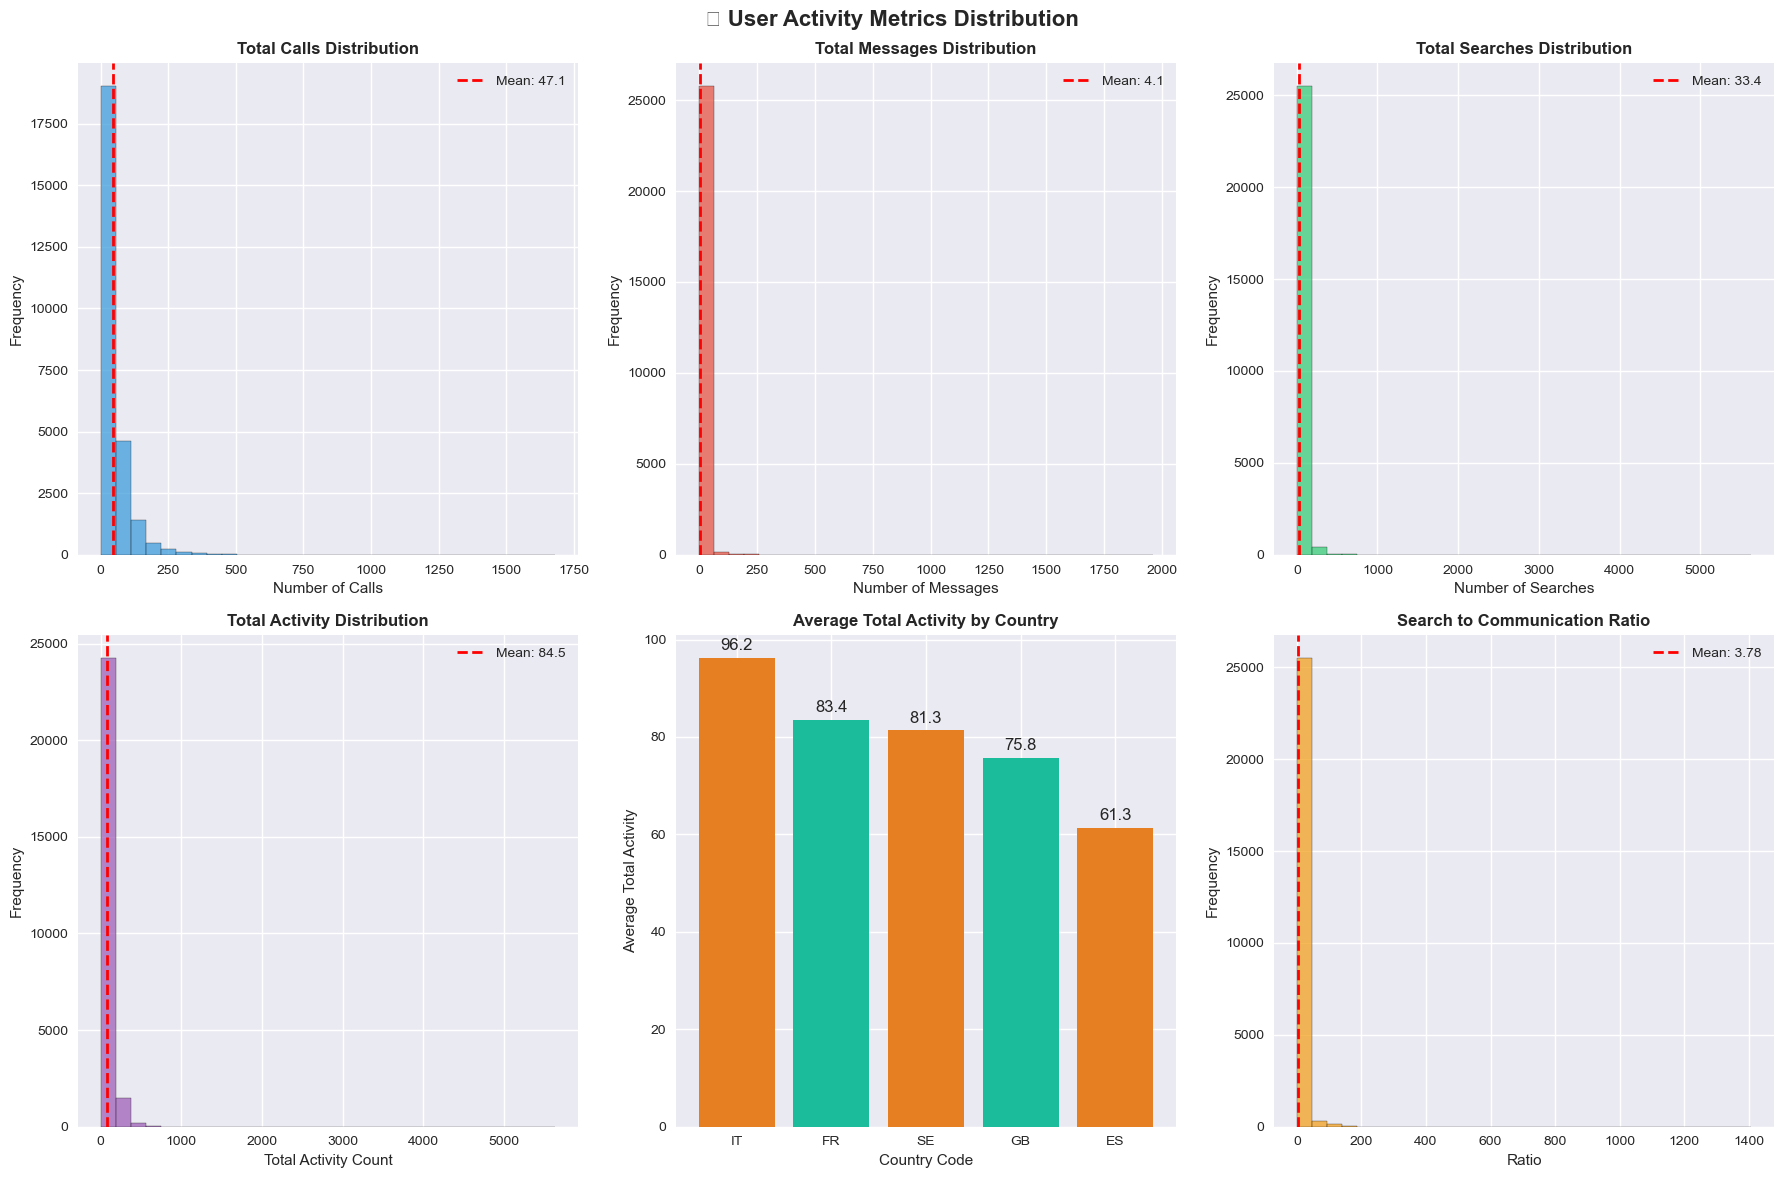

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📈 User Activity Metrics Distribution', fontsize=16, fontweight='bold')

# Total Calls Distribution
ax1 = axes[0, 0]
ax1.hist(df['total_calls'].dropna(), bins=30, alpha=0.7, color='#3498db', edgecolor='black')
ax1.set_title('Total Calls Distribution', fontweight='bold')
ax1.set_xlabel('Number of Calls')
ax1.set_ylabel('Frequency')
ax1.axvline(df['total_calls'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {df["total_calls"].mean():.1f}')
ax1.legend()

# Total Messages Distribution
ax2 = axes[0, 1]
ax2.hist(df['total_messages'].dropna(), bins=30, alpha=0.7, color='#e74c3c', edgecolor='black')
ax2.set_title('Total Messages Distribution', fontweight='bold')
ax2.set_xlabel('Number of Messages')
ax2.set_ylabel('Frequency')
ax2.axvline(df['total_messages'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {df["total_messages"].mean():.1f}')
ax2.legend()

# Total Searches Distribution
ax3 = axes[0, 2]
ax3.hist(df['total_searches'], bins=30, alpha=0.7, color='#2ecc71', edgecolor='black')
ax3.set_title('Total Searches Distribution', fontweight='bold')
ax3.set_xlabel('Number of Searches')
ax3.set_ylabel('Frequency')
ax3.axvline(df['total_searches'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {df["total_searches"].mean():.1f}')
ax3.legend()

# Total Activity Distribution
ax4 = axes[1, 0]
ax4.hist(df['total_activity'], bins=30, alpha=0.7, color='#9b59b6', edgecolor='black')
ax4.set_title('Total Activity Distribution', fontweight='bold')
ax4.set_xlabel('Total Activity Count')
ax4.set_ylabel('Frequency')
ax4.axvline(df['total_activity'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {df["total_activity"].mean():.1f}')
ax4.legend()

# Activity by Country
ax5 = axes[1, 1]
activity_by_country = df.groupby('country_code')['total_activity'].mean().sort_values(ascending=False)
bars = ax5.bar(activity_by_country.index, activity_by_country.values, color=['#e67e22', '#1abc9c'])
ax5.set_title('Average Total Activity by Country', fontweight='bold')
ax5.set_xlabel('Country Code')
ax5.set_ylabel('Average Total Activity')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}', ha='center', va='bottom')

# Search to Communication Ratio
ax6 = axes[1, 2]
ax6.hist(df['search_to_communication_ratio'], bins=30, alpha=0.7, color='#f39c12', edgecolor='black')
ax6.set_title('Search to Communication Ratio', fontweight='bold')
ax6.set_xlabel('Ratio')
ax6.set_ylabel('Frequency')
ax6.axvline(df['search_to_communication_ratio'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {df["search_to_communication_ratio"].mean():.2f}')
ax6.legend()

plt.tight_layout()
plt.show()

# 3. FEATURE EXPLORATION - FREQUENCY & RATE METRICS

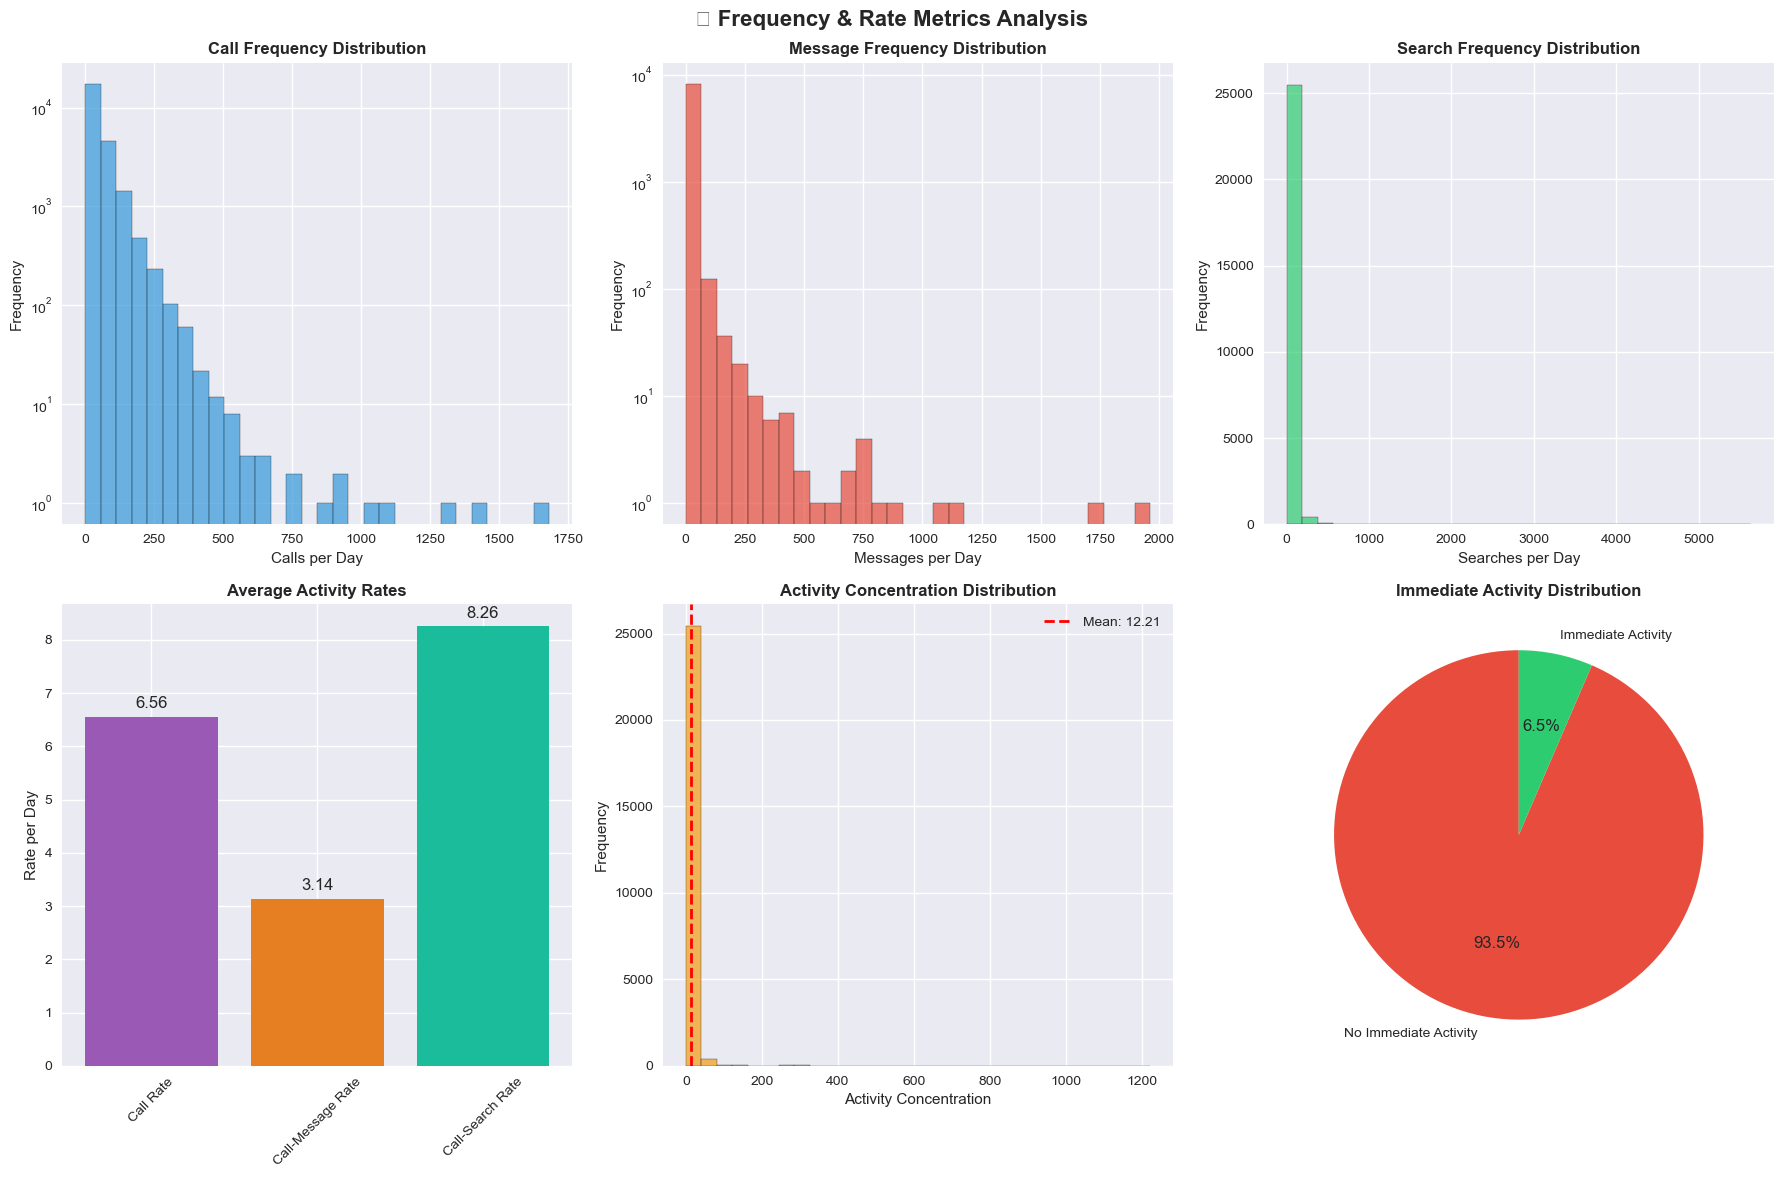

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('⚡ Frequency & Rate Metrics Analysis', fontsize=16, fontweight='bold')

# Call Frequency
ax1 = axes[0, 0]
call_freq_data = df['call_frequency'].dropna()
ax1.hist(call_freq_data, bins=30, alpha=0.7, color='#3498db', edgecolor='black')
ax1.set_title('Call Frequency Distribution', fontweight='bold')
ax1.set_xlabel('Calls per Day')
ax1.set_ylabel('Frequency')
ax1.set_yscale('log')

# Message Frequency
ax2 = axes[0, 1]
msg_freq_data = df['message_frequency'].dropna()
if len(msg_freq_data) > 0:
    ax2.hist(msg_freq_data, bins=30, alpha=0.7, color='#e74c3c', edgecolor='black')
    ax2.set_title('Message Frequency Distribution', fontweight='bold')
    ax2.set_xlabel('Messages per Day')
    ax2.set_ylabel('Frequency')
    ax2.set_yscale('log')
else:
    ax2.text(0.5, 0.5, 'No Message\nFrequency Data', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Message Frequency Distribution', fontweight='bold')

# Search Frequency
ax3 = axes[0, 2]
ax3.hist(df['search_frequency'], bins=30, alpha=0.7, color='#2ecc71', edgecolor='black')
ax3.set_title('Search Frequency Distribution', fontweight='bold')
ax3.set_xlabel('Searches per Day')
ax3.set_ylabel('Frequency')

# Activity Rates Comparison
ax4 = axes[1, 0]
rate_cols = ['call_rate_per_day', 'call_message_per_day', 'call_searches_per_day']
rate_means = [df[col].mean() for col in rate_cols]
bars = ax4.bar(range(len(rate_cols)), rate_means, color=['#9b59b6', '#e67e22', '#1abc9c'])
ax4.set_title('Average Activity Rates', fontweight='bold')
ax4.set_xticks(range(len(rate_cols)))
ax4.set_xticklabels(['Call Rate', 'Call-Message Rate', 'Call-Search Rate'], rotation=45)
ax4.set_ylabel('Rate per Day')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom')

# Activity Concentration
ax5 = axes[1, 1]
ax5.hist(df['activity_concentration'], bins=30, alpha=0.7, color='#f39c12', edgecolor='black')
ax5.set_title('Activity Concentration Distribution', fontweight='bold')
ax5.set_xlabel('Activity Concentration')
ax5.set_ylabel('Frequency')
ax5.axvline(df['activity_concentration'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {df["activity_concentration"].mean():.2f}')
ax5.legend()

# Immediate Activity
ax6 = axes[1, 2]
immediate_counts = df['immediate_activity'].value_counts()
colors = ['#e74c3c', '#2ecc71']
wedges, texts, autotexts = ax6.pie(immediate_counts.values, labels=['No Immediate Activity', 'Immediate Activity'], 
                                   colors=colors, autopct='%1.1f%%', startangle=90)
ax6.set_title('Immediate Activity Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

# 4. FEATURE EXPLORATION - TEMPORAL PATTERNS

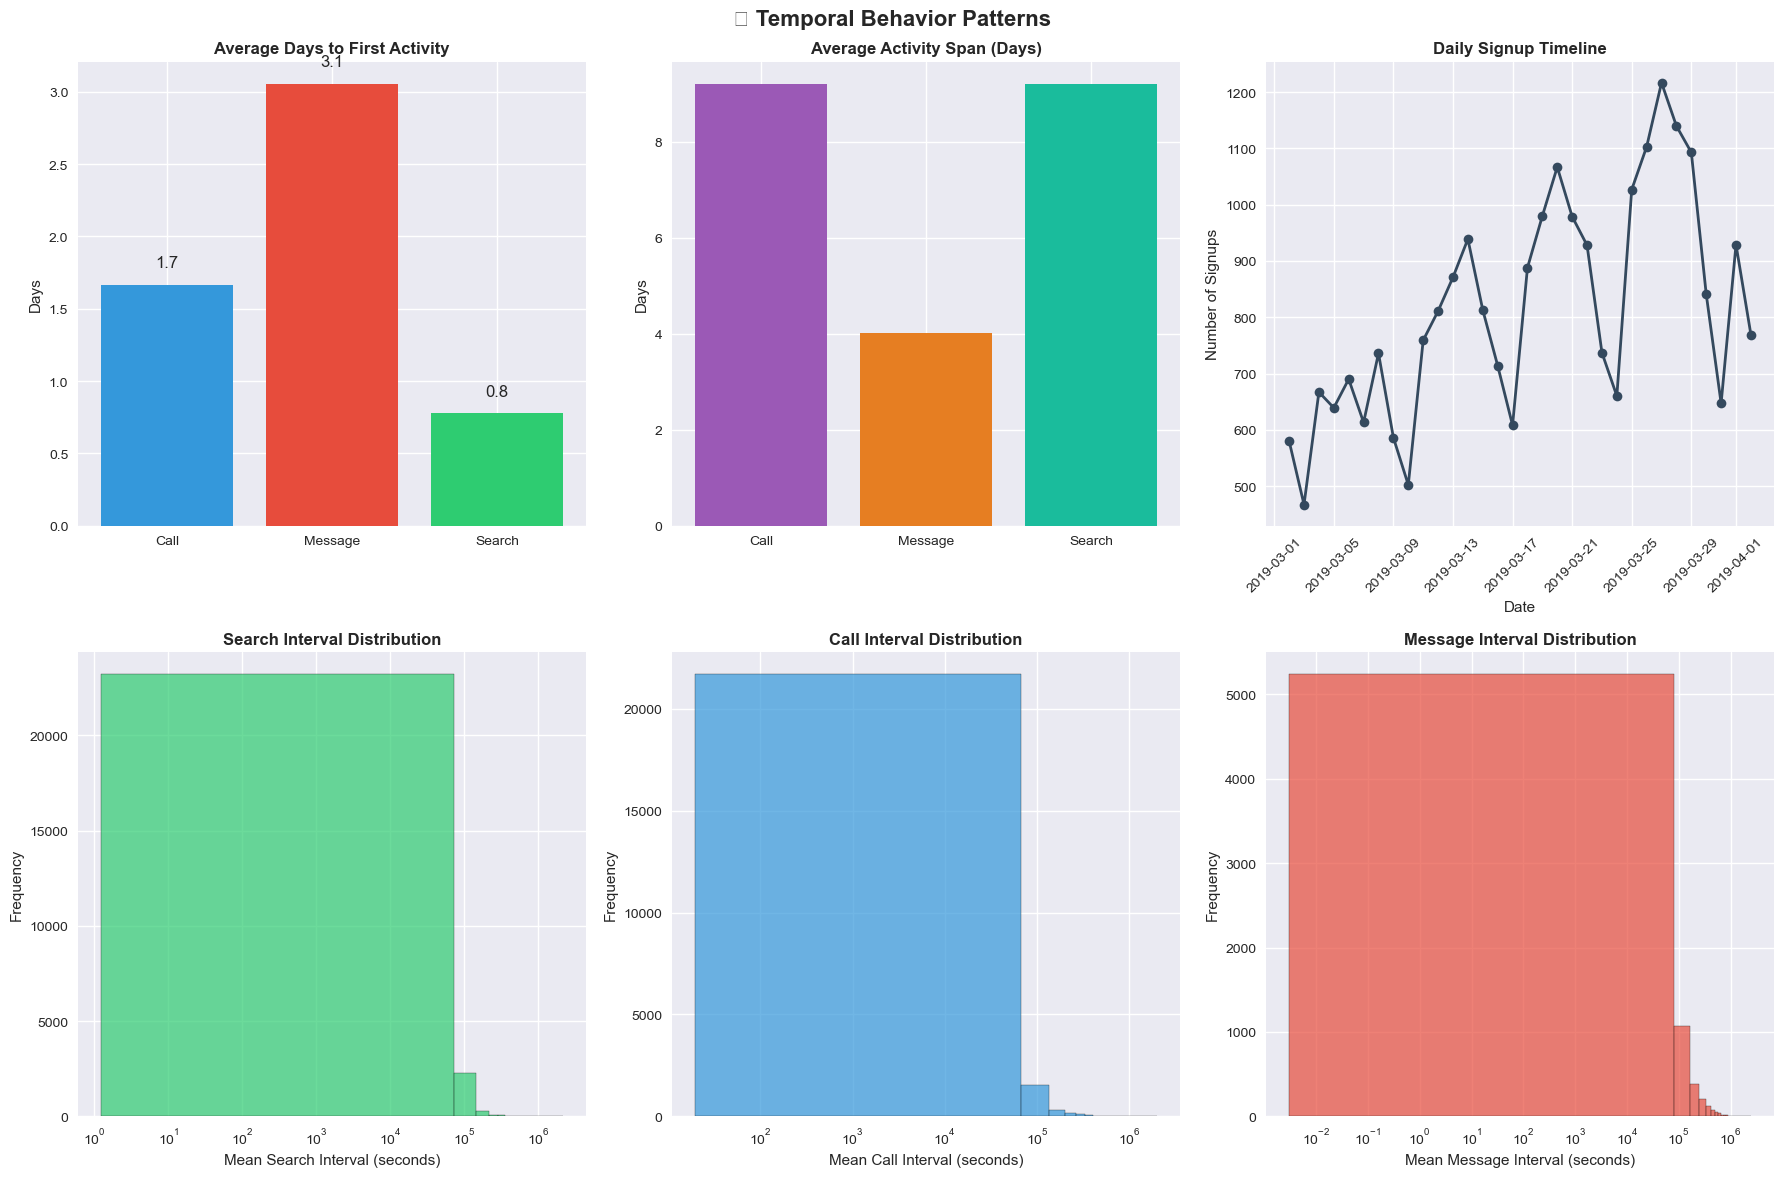

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('⏰ Temporal Behavior Patterns', fontsize=16, fontweight='bold')

# Days from signup to first activity
ax1 = axes[0, 0]
time_to_first = ['days_signup_to_first_call', 'days_signup_to_first_message', 'days_signup_to_first_search']
time_means = []
time_labels = []

for col in time_to_first:
    data = df[col].dropna()
    if len(data) > 0:
        time_means.append(data.mean())
        time_labels.append(col.replace('days_signup_to_first_', '').title())

bars = ax1.bar(range(len(time_labels)), time_means, color=['#3498db', '#e74c3c', '#2ecc71'])
ax1.set_title('Average Days to First Activity', fontweight='bold')
ax1.set_xticks(range(len(time_labels)))
ax1.set_xticklabels(time_labels)
ax1.set_ylabel('Days')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom')

# Activity Span Analysis
ax2 = axes[0, 1]
span_cols = ['call_span_days', 'message_span_days', 'search_span_days']
span_means = []
span_labels = []

for col in span_cols:
    data = df[col].dropna()
    if len(data) > 0:
        span_means.append(data.mean())
        span_labels.append(col.replace('_span_days', '').title())

if span_means:
    bars = ax2.bar(range(len(span_labels)), span_means, color=['#9b59b6', '#e67e22', '#1abc9c'])
    ax2.set_title('Average Activity Span (Days)', fontweight='bold')
    ax2.set_xticks(range(len(span_labels)))
    ax2.set_xticklabels(span_labels)
    ax2.set_ylabel('Days')

# Signup Timeline
ax3 = axes[0, 2]
df['signup_date'] = pd.to_datetime(df['signup_datetime']).dt.date
signup_counts = df['signup_date'].value_counts().sort_index()
ax3.plot(signup_counts.index, signup_counts.values, marker='o', color='#34495e', linewidth=2)
ax3.set_title('Daily Signup Timeline', fontweight='bold')
ax3.set_xlabel('Date')
ax3.set_ylabel('Number of Signups')
ax3.tick_params(axis='x', rotation=45)

# Interval Analysis - Search Intervals
ax4 = axes[1, 0]
search_intervals = df['search_interval_mean_sec'].dropna()
if len(search_intervals) > 0:
    ax4.hist(search_intervals, bins=30, alpha=0.7, color='#2ecc71', edgecolor='black')
    ax4.set_title('Search Interval Distribution', fontweight='bold')
    ax4.set_xlabel('Mean Search Interval (seconds)')
    ax4.set_ylabel('Frequency')
    ax4.set_xscale('log')

# Call Intervals
ax5 = axes[1, 1]
call_intervals = df['call_interval_mean_sec'].dropna()
if len(call_intervals) > 0:
    ax5.hist(call_intervals, bins=30, alpha=0.7, color='#3498db', edgecolor='black')
    ax5.set_title('Call Interval Distribution', fontweight='bold')
    ax5.set_xlabel('Mean Call Interval (seconds)')
    ax5.set_ylabel('Frequency')
    ax5.set_xscale('log')

# Message Intervals
ax6 = axes[1, 2]
msg_intervals = df['message_interval_mean_sec'].dropna()
if len(msg_intervals) > 0:
    ax6.hist(msg_intervals, bins=30, alpha=0.7, color='#e74c3c', edgecolor='black')
    ax6.set_title('Message Interval Distribution', fontweight='bold')
    ax6.set_xlabel('Mean Message Interval (seconds)')
    ax6.set_ylabel('Frequency')
    ax6.set_xscale('log')
else:
    ax6.text(0.5, 0.5, 'No Message\nInterval Data', ha='center', va='center', transform=ax6.transAxes)
    ax6.set_title('Message Interval Distribution', fontweight='bold')

plt.tight_layout()
plt.show()


# 5. FEATURE CORRELATIONS & RELATIONSHIPS



🔗 FEATURE CORRELATION ANALYSIS


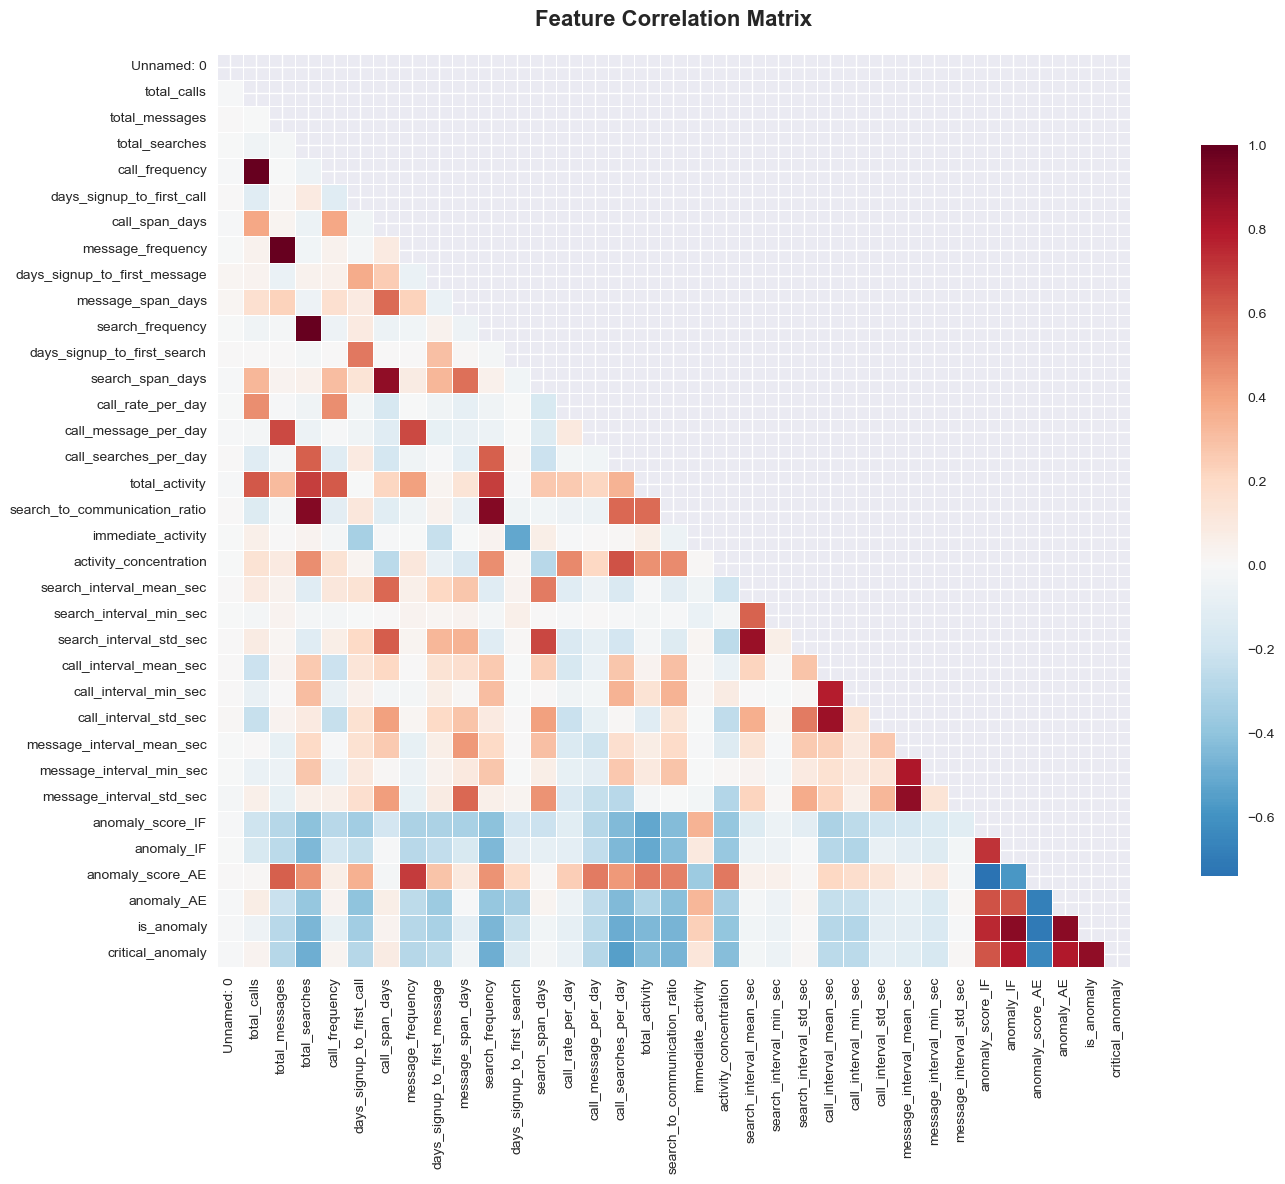

🔍 Strongest Correlations (>0.7 or <-0.7):
  total_calls ↔ call_frequency: 1.000
  total_messages ↔ message_frequency: 1.000
  total_searches ↔ search_frequency: 1.000
  total_searches ↔ search_to_communication_ratio: 0.916
  search_frequency ↔ search_to_communication_ratio: 0.916
  anomaly_AE ↔ is_anomaly: 0.902
  anomaly_IF ↔ is_anomaly: 0.902
  message_interval_mean_sec ↔ message_interval_std_sec: 0.884
  call_span_days ↔ search_span_days: 0.884
  is_anomaly ↔ critical_anomaly: 0.883


In [19]:

print("\n🔗 FEATURE CORRELATION ANALYSIS")
print("=" * 35)

# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove user_id and anomaly for correlation analysis
numerical_cols = [col for col in numerical_cols if col not in ['user_id', 'anomaly']]

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Strong correlations analysis
print("🔍 Strongest Correlations (>0.7 or <-0.7):")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

strong_corr.sort(key=lambda x: abs(x[2]), reverse=True)
for feat1, feat2, corr in strong_corr[:10]:  # Top 10 strongest correlations
    print(f"  {feat1} ↔ {feat2}: {corr:.3f}")

# 6. FEATURE STATISTICS SUMMARY

In [20]:
print(f"\n📊 FEATURE STATISTICS SUMMARY")
print("=" * 35)

# Key activity metrics
activity_stats = df[['total_calls', 'total_messages', 'total_searches', 'total_activity']].describe()
print("Activity Metrics Summary:")
print(activity_stats.round(2))

print(f"\nKey Insights from Feature Exploration:")
print(f"• Average user makes {df['total_calls'].mean():.1f} calls")
print(f"• Average user makes {df['total_messages'].mean():.1f} messages") 
print(f"• Average user performs {df['total_searches'].mean():.1f} searches")
print(f"• Search-to-communication ratio averages {df['search_to_communication_ratio'].mean():.2f}")
print(f"• {df['immediate_activity'].mean()*100:.1f}% of users show immediate activity")
print(f"• Average activity concentration: {df['activity_concentration'].mean():.2f}")



📊 FEATURE STATISTICS SUMMARY
Activity Metrics Summary:
       total_calls  total_messages  total_searches  total_activity
count     26000.00        26000.00        26000.00        26000.00
mean         47.07            4.07           33.35           84.49
std          57.29           29.06           63.69           88.52
min           0.00            0.00            1.00            3.00
25%          15.00            0.00           19.00           42.00
50%          30.00            0.00           28.00           63.00
75%          59.00            2.00           35.00           98.00
max        1681.00         1961.00         5632.00         5635.00

Key Insights from Feature Exploration:
• Average user makes 47.1 calls
• Average user makes 4.1 messages
• Average user performs 33.4 searches
• Search-to-communication ratio averages 3.78
• 93.5% of users show immediate activity
• Average activity concentration: 12.21


# DIVING INTO ANOMALY ANALYSIS

In [ ]:
print(f"\n🚨 ANOMALY DETECTION ANALYSIS")
print("=" * 40)

# Correct interpretation: -1 = anomalies, 1 = normal
anomaly_counts = df['anomaly'].value_counts().sort_index()
critical_anomaly_counts = df['critical_anomaly'].value_counts().sort_index()
print(f"Anomaly Distribution:")
print(f"  Normal Users (1): {anomaly_counts.get(1, 0):,}")
print(f"  Anomalous Users (-1): {anomaly_counts.get(-1, 0):,}")
print(f"  Critical Anomalous Users (-1): {critical_anomaly_counts.get(-1, 0):,}")

if -1 in anomaly_counts:
    anomaly_rate = anomaly_counts[-1] / len(df) * 100
    print(f"  Anomaly Rate: {anomaly_rate:.1f}%")

if -1 in critical_anomaly_counts:
    anomaly_rate = critical_anomaly_counts[-1] / len(df) * 100
    print(f"  Anomaly Rate: {anomaly_rate:.1f}%")


🚨 ANOMALY DETECTION ANALYSIS
Anomaly Distribution:
  Normal Users (1): 24,241
  Anomalous Users (-1): 1,759
  Critical Anomalous Users (-1): 841
  Anomaly Rate: 6.8%
  Anomaly Rate: 3.2%


# OVERALL ANOMALY PATTERN ANALYSIS

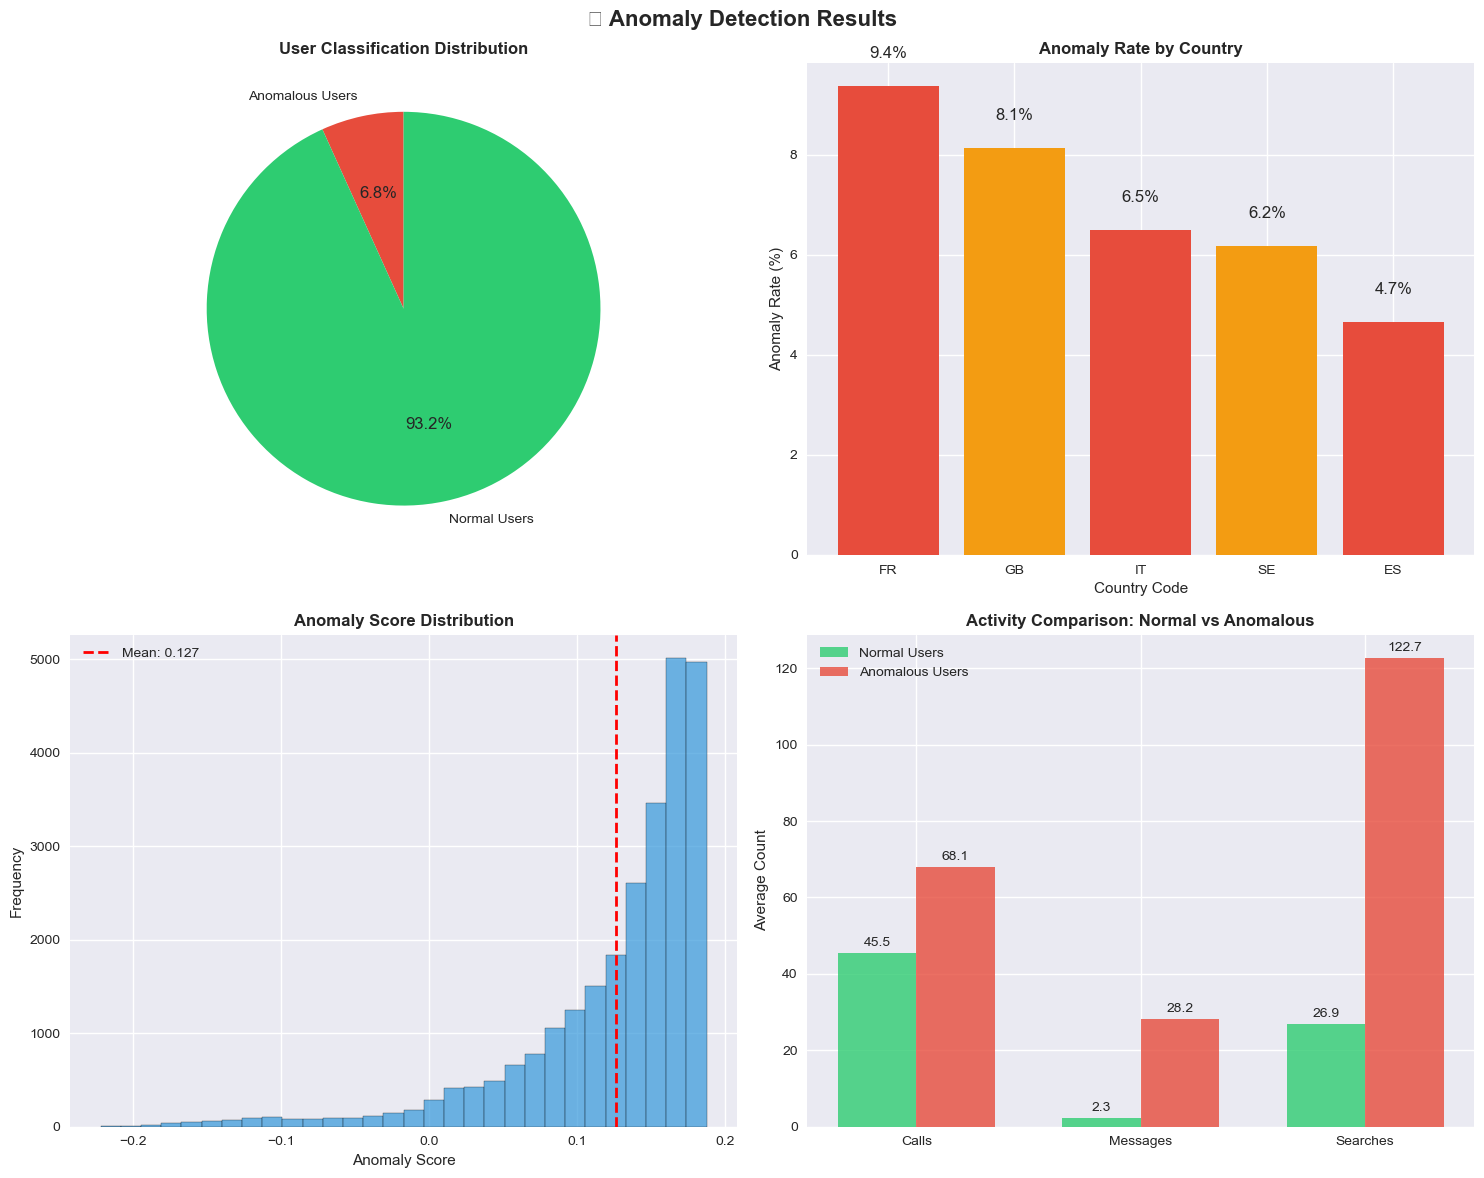

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🚨 Anomaly Detection Results', fontsize=16, fontweight='bold')

# Anomaly distribution
ax1 = axes[0, 0]
anomaly_labels = ['Anomalous Users', 'Normal Users'] if -1 in anomaly_counts else ['Normal Users']
anomaly_values = [anomaly_counts.get(-1, 0), anomaly_counts.get(1, 0)] if -1 in anomaly_counts else [anomaly_counts.get(1, 0)]
colors = ['#e74c3c', '#2ecc71'] if -1 in anomaly_counts else ['#2ecc71']

wedges, texts, autotexts = ax1.pie(anomaly_values, labels=anomaly_labels, 
                                   colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('User Classification Distribution', fontweight='bold')

# Country-wise anomaly analysis
ax2 = axes[0, 1]
if -1 in df['anomaly'].values:
    country_anomaly = df.groupby('country_code')['anomaly'].agg(['count', lambda x: (x == -1).sum()]).reset_index()
    country_anomaly.columns = ['country_code', 'total_users', 'anomalous_users']
    country_anomaly['anomaly_rate'] = (country_anomaly['anomalous_users'] / country_anomaly['total_users']) * 100
    country_anomaly = country_anomaly.sort_values('anomaly_rate', ascending=False)
    
    bars = ax2.bar(country_anomaly['country_code'], country_anomaly['anomaly_rate'], 
                   color=['#e74c3c', '#f39c12'])
    ax2.set_title('Anomaly Rate by Country', fontweight='bold')
    ax2.set_ylabel('Anomaly Rate (%)')
    ax2.set_xlabel('Country Code')
    
    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f'{height:.1f}%', ha='center', va='bottom')
else:
    ax2.text(0.5, 0.5, 'No Anomalies\nDetected', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Anomaly Rate by Country', fontweight='bold')

# Anomaly score distribution
ax3 = axes[1, 0]
ax3.hist(df['anomaly_score_IF'], bins=30, alpha=0.7, color='#3498db', edgecolor='black')
ax3.axvline(df['anomaly_score_IF'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {df["anomaly_score_IF"].mean():.3f}')
ax3.set_title('Anomaly Score Distribution', fontweight='bold')
ax3.set_xlabel('Anomaly Score')
ax3.set_ylabel('Frequency')
ax3.legend()

# Activity comparison between normal and anomalous users
ax4 = axes[1, 1]
if -1 in df['anomaly'].values:
    normal_users = df[df['anomaly'] == 1]
    anomalous_users = df[df['anomaly'] == -1]
    
    activity_comparison = {
        'Normal Users': [normal_users['total_calls'].mean(), 
                        normal_users['total_messages'].mean(), 
                        normal_users['total_searches'].mean()],
        'Anomalous Users': [anomalous_users['total_calls'].mean(), 
                           anomalous_users['total_messages'].mean(), 
                           anomalous_users['total_searches'].mean()]
    }
    
    x = np.arange(3)
    width = 0.35
    
    bars1 = ax4.bar(x - width/2, activity_comparison['Normal Users'], width, 
                    label='Normal Users', color='#2ecc71', alpha=0.8)
    bars2 = ax4.bar(x + width/2, activity_comparison['Anomalous Users'], width, 
                    label='Anomalous Users', color='#e74c3c', alpha=0.8)
    
    ax4.set_title('Activity Comparison: Normal vs Anomalous', fontweight='bold')
    ax4.set_ylabel('Average Count')
    ax4.set_xticks(x)
    ax4.set_xticklabels(['Calls', 'Messages', 'Searches'])
    ax4.legend()
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
                     f'{height:.1f}', ha='center', va='bottom', fontsize=10)
else:
    ax4.text(0.5, 0.5, 'No Anomalies\nDetected', ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('Activity Comparison', fontweight='bold')

plt.tight_layout()
plt.show()


# CRITICAL OVERALL ANOMALY PATTERN ANALYSIS

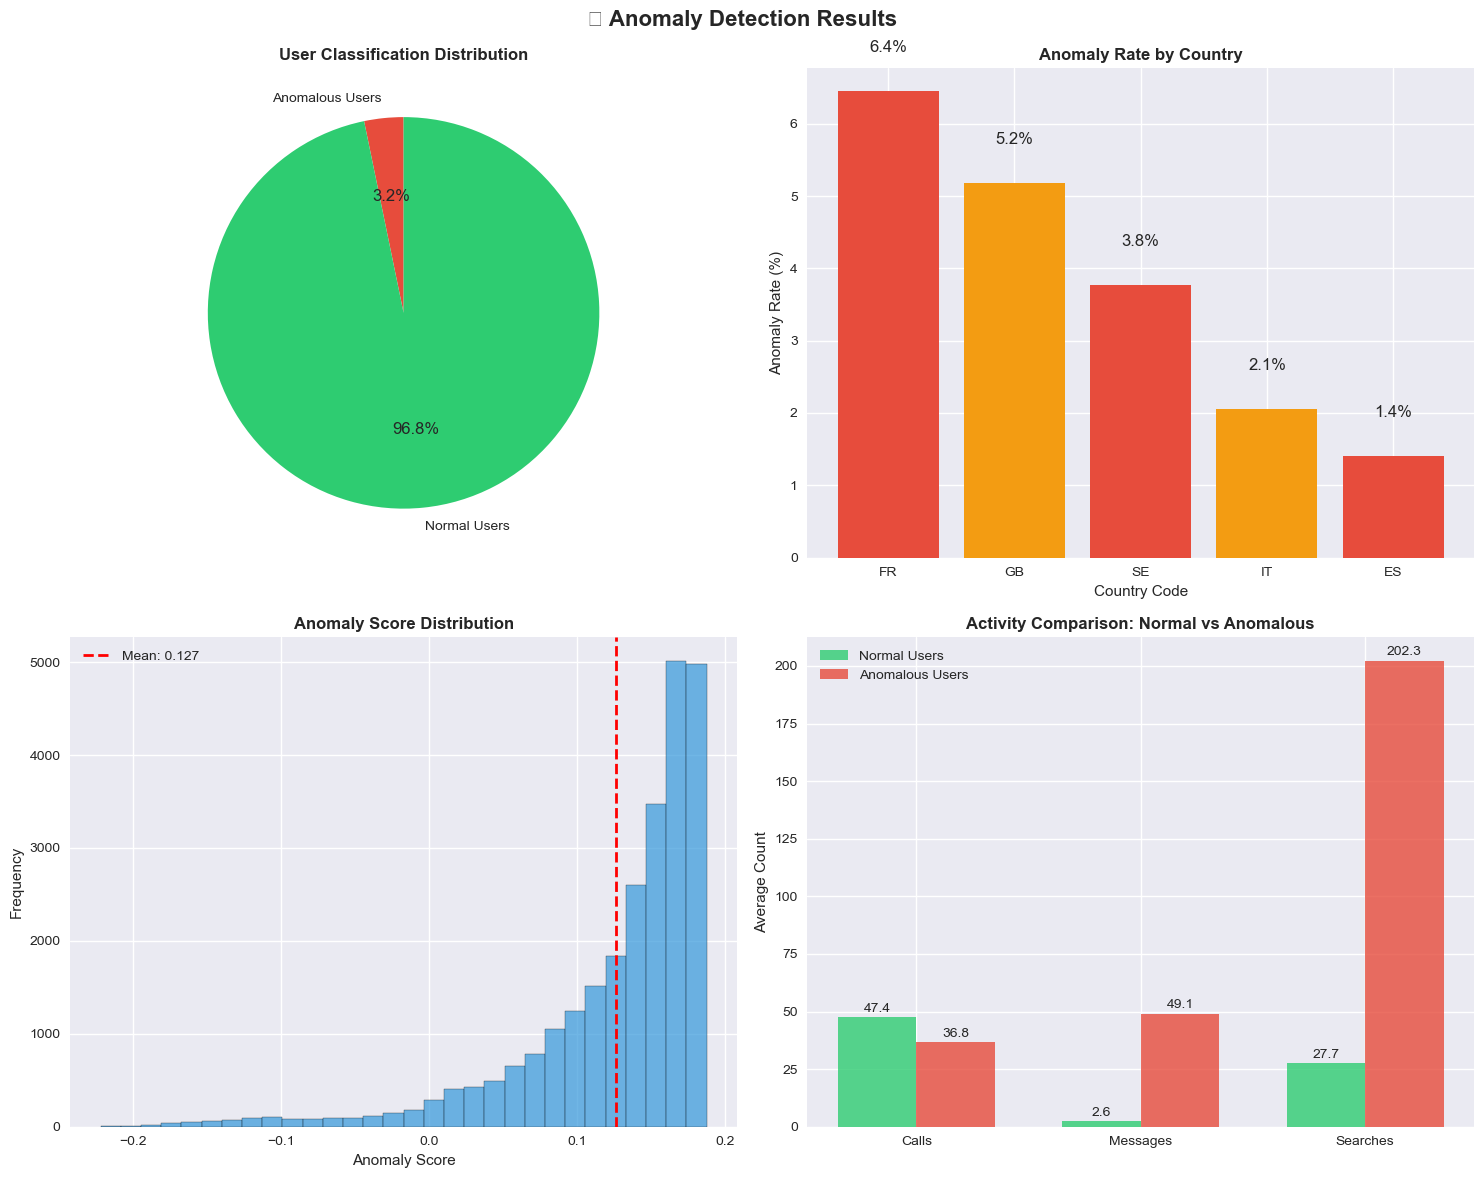

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🚨 Anomaly Detection Results', fontsize=16, fontweight='bold')

# Anomaly distribution
ax1 = axes[0, 0]
anomaly_labels = ['Anomalous Users', 'Normal Users'] if -1 in critical_anomaly_counts else ['Normal Users']
anomaly_values = [critical_anomaly_counts.get(-1, 0), critical_anomaly_counts.get(1, 0)] if -1 in critical_anomaly_counts else [critical_anomaly_counts.get(1, 0)]
colors = ['#e74c3c', '#2ecc71'] if -1 in critical_anomaly_counts else ['#2ecc71']

wedges, texts, autotexts = ax1.pie(anomaly_values, labels=anomaly_labels, 
                                   colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('User Classification Distribution', fontweight='bold')

# Country-wise anomaly analysis
ax2 = axes[0, 1]
if -1 in df['critical_anomaly'].values:
    country_anomaly = df.groupby('country_code')['critical_anomaly'].agg(['count', lambda x: (x == -1).sum()]).reset_index()
    country_anomaly.columns = ['country_code', 'total_users', 'anomalous_users']
    country_anomaly['anomaly_rate'] = (country_anomaly['anomalous_users'] / country_anomaly['total_users']) * 100
    country_anomaly = country_anomaly.sort_values('anomaly_rate', ascending=False)
    
    bars = ax2.bar(country_anomaly['country_code'], country_anomaly['anomaly_rate'], 
                   color=['#e74c3c', '#f39c12'])
    ax2.set_title('Anomaly Rate by Country', fontweight='bold')
    ax2.set_ylabel('Anomaly Rate (%)')
    ax2.set_xlabel('Country Code')
    
    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f'{height:.1f}%', ha='center', va='bottom')
else:
    ax2.text(0.5, 0.5, 'No Anomalies\nDetected', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Anomaly Rate by Country', fontweight='bold')

# Anomaly score distribution
ax3 = axes[1, 0]
ax3.hist(df['anomaly_score_IF'], bins=30, alpha=0.7, color='#3498db', edgecolor='black')
ax3.axvline(df['anomaly_score_IF'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {df["anomaly_score_IF"].mean():.3f}')
ax3.set_title('Anomaly Score Distribution', fontweight='bold')
ax3.set_xlabel('Anomaly Score')
ax3.set_ylabel('Frequency')
ax3.legend()

# Activity comparison between normal and anomalous users
ax4 = axes[1, 1]
if -1 in df['critical_anomaly'].values:
    normal_users = df[df['critical_anomaly'] == 1]
    anomalous_users = df[df['critical_anomaly'] == -1]
    
    activity_comparison = {
        'Normal Users': [normal_users['total_calls'].mean(), 
                        normal_users['total_messages'].mean(), 
                        normal_users['total_searches'].mean()],
        'Anomalous Users': [anomalous_users['total_calls'].mean(), 
                           anomalous_users['total_messages'].mean(), 
                           anomalous_users['total_searches'].mean()]
    }
    
    x = np.arange(3)
    width = 0.35
    
    bars1 = ax4.bar(x - width/2, activity_comparison['Normal Users'], width, 
                    label='Normal Users', color='#2ecc71', alpha=0.8)
    bars2 = ax4.bar(x + width/2, activity_comparison['Anomalous Users'], width, 
                    label='Anomalous Users', color='#e74c3c', alpha=0.8)
    
    ax4.set_title('Activity Comparison: Normal vs Anomalous', fontweight='bold')
    ax4.set_ylabel('Average Count')
    ax4.set_xticks(x)
    ax4.set_xticklabels(['Calls', 'Messages', 'Searches'])
    ax4.legend()
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
                     f'{height:.1f}', ha='center', va='bottom', fontsize=10)
else:
    ax4.text(0.5, 0.5, 'No Anomalies\nDetected', ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('Activity Comparison', fontweight='bold')

plt.tight_layout()
plt.show()


# DETAILED ANOMALY CHARACTERISTICS - OVERALL

In [29]:
if -1 in df['anomaly'].values:
    print(f"\n🔍 ANOMALOUS USER CHARACTERISTICS")
    print("=" * 40)
    
    normal_users = df[df['anomaly'] == 1]
    anomalous_users = df[df['anomaly'] == -1]
    
    print(f"📊 Comparative Analysis:")
    print(f"Normal Users ({len(normal_users):,}):")
    print(f"  • Avg Searches: {normal_users['total_searches'].mean():.1f}")
    print(f"  • Avg Search-to-Comm Ratio: {normal_users['search_to_communication_ratio'].mean():.2f}")
    print(f"  • Avg Activity Concentration: {normal_users['activity_concentration'].mean():.2f}")
    print(f"  • Immediate Activity Rate: {normal_users['immediate_activity'].mean()*100:.1f}%")
    
    print(f"\nAnomalous Users ({len(anomalous_users):,}):")
    print(f"  • Avg Searches: {anomalous_users['total_searches'].mean():.1f}")
    print(f"  • Avg Search-to-Comm Ratio: {anomalous_users['search_to_communication_ratio'].mean():.2f}")
    print(f"  • Avg Activity Concentration: {anomalous_users['activity_concentration'].mean():.2f}")
    print(f"  • Immediate Activity Rate: {anomalous_users['immediate_activity'].mean()*100:.1f}%")
    
    # Key differentiators
    search_ratio_diff = anomalous_users['total_searches'].mean() / normal_users['total_searches'].mean()
    print(f"\n🎯 Key Differentiators:")
    print(f"  • Anomalous users perform {search_ratio_diff:.1f}x more searches")
    print(f"  • Search-to-comm ratio is {anomalous_users['search_to_communication_ratio'].mean() / normal_users['search_to_communication_ratio'].mean():.1f}x higher")
    
    # Generate suspected user list
    suspected_users = anomalous_users['user_id'].tolist()
    print(f"\n📋 SUSPECTED USER IDs ({len(suspected_users)} users):")
    print(f"   {suspected_users}")
    
else:
    print(f"\n✅ No anomalous users detected in the dataset")

print(f"\n🎯 CONCLUSION")
print("=" * 25)
print("Feature exploration reveals clear behavioral patterns that distinguish")
print("normal users from potential scrapers. The analysis shows specific")
print("characteristics that can be used for fraud detection and prevention.")


🔍 ANOMALOUS USER CHARACTERISTICS
📊 Comparative Analysis:
Normal Users (24,241):
  • Avg Searches: 26.9
  • Avg Search-to-Comm Ratio: 1.72
  • Avg Activity Concentration: 10.26
  • Immediate Activity Rate: 95.4%

Anomalous Users (1,759):
  • Avg Searches: 122.7
  • Avg Search-to-Comm Ratio: 32.25
  • Avg Activity Concentration: 39.08
  • Immediate Activity Rate: 67.2%

🎯 Key Differentiators:
  • Anomalous users perform 4.6x more searches
  • Search-to-comm ratio is 18.8x higher

📋 SUSPECTED USER IDs (1759 users):
   [10000031, 10000040, 10000057, 10000071, 10000073, 10000082, 10000087, 10000099, 10000107, 10000108, 10000115, 10000135, 10000138, 10000142, 10000155, 10000161, 10000191, 10000208, 10000240, 10000248, 10000281, 10000297, 10000308, 10000342, 10000346, 10000358, 10000412, 10000423, 10000469, 10000547, 10000550, 10000576, 10000580, 10000612, 10000615, 10000636, 10000687, 10000691, 10000711, 10000729, 10000735, 10000811, 10000827, 10000828, 10000833, 10000842, 10000859, 1000086

# DETAILED ANOMALY CHARACTERISTICS - CRITICAL

In [30]:
if -1 in df['critical_anomaly'].values:
    print(f"\n🔍 ANOMALOUS USER CHARACTERISTICS")
    print("=" * 40)
    
    normal_users = df[df['critical_anomaly'] == 1]
    anomalous_users = df[df['critical_anomaly'] == -1]
    
    print(f"📊 Comparative Analysis:")
    print(f"Normal Users ({len(normal_users):,}):")
    print(f"  • Avg Searches: {normal_users['total_searches'].mean():.1f}")
    print(f"  • Avg Search-to-Comm Ratio: {normal_users['search_to_communication_ratio'].mean():.2f}")
    print(f"  • Avg Activity Concentration: {normal_users['activity_concentration'].mean():.2f}")
    print(f"  • Immediate Activity Rate: {normal_users['immediate_activity'].mean()*100:.1f}%")
    
    print(f"\nAnomalous Users ({len(anomalous_users):,}):")
    print(f"  • Avg Searches: {anomalous_users['total_searches'].mean():.1f}")
    print(f"  • Avg Search-to-Comm Ratio: {anomalous_users['search_to_communication_ratio'].mean():.2f}")
    print(f"  • Avg Activity Concentration: {anomalous_users['activity_concentration'].mean():.2f}")
    print(f"  • Immediate Activity Rate: {anomalous_users['immediate_activity'].mean()*100:.1f}%")
    
    # Key differentiators
    search_ratio_diff = anomalous_users['total_searches'].mean() / normal_users['total_searches'].mean()
    print(f"\n🎯 Key Differentiators:")
    print(f"  • Anomalous users perform {search_ratio_diff:.1f}x more searches")
    print(f"  • Search-to-comm ratio is {anomalous_users['search_to_communication_ratio'].mean() / normal_users['search_to_communication_ratio'].mean():.1f}x higher")
    
    # Generate suspected user list
    suspected_users = anomalous_users['user_id'].tolist()
    print(f"\n📋 SUSPECTED USER IDs ({len(suspected_users)} users):")
    print(f"   {suspected_users}")
    
else:
    print(f"\n✅ No anomalous users detected in the dataset")

print(f"\n🎯 CONCLUSION")
print("=" * 25)
print("Feature exploration reveals clear behavioral patterns that distinguish")
print("normal users from potential scrapers. The analysis shows specific")
print("characteristics that can be used for fraud detection and prevention.")


🔍 ANOMALOUS USER CHARACTERISTICS
📊 Comparative Analysis:
Normal Users (25,159):
  • Avg Searches: 27.7
  • Avg Search-to-Comm Ratio: 2.13
  • Avg Activity Concentration: 10.50
  • Immediate Activity Rate: 94.1%

Anomalous Users (841):
  • Avg Searches: 202.3
  • Avg Search-to-Comm Ratio: 53.22
  • Avg Activity Concentration: 63.40
  • Immediate Activity Rate: 77.2%

🎯 Key Differentiators:
  • Anomalous users perform 7.3x more searches
  • Search-to-comm ratio is 25.0x higher

📋 SUSPECTED USER IDs (841 users):
   [10000031, 10000071, 10000073, 10000082, 10000108, 10000115, 10000155, 10000281, 10000297, 10000342, 10000412, 10000550, 10000576, 10000580, 10000615, 10000636, 10000828, 10000833, 10000842, 10000859, 10000863, 10000871, 10000882, 10000888, 10000889, 10000915, 10000951, 10000961, 10000984, 10001024, 10001054, 10001067, 10001089, 10001116, 10001140, 10001162, 10001165, 10001251, 10001264, 10001286, 10001292, 10001302, 10001304, 10001306, 10001358, 10001376, 10001389, 10001390, 